# 【問題1】各種手法の実行
Kerasには4種類のReccurentレイヤーが用意されています。SimpleRNN以外はゲート付きリカレントニューラルネットワークです。


1. SimpleRNN
2. GRU
3. LSTM
4. ConvLSTM2D

これらを実行してください。この中でSimpleRNN、GRU、LSTMは同様のタスクに用いることができるため、精度の比較も行なってください。


Keras公式のサンプルコードを利用してください。

In [2]:
# LSTM
from __future__ import print_function

from tensorflow.keras.preprocessing import sequence # 時系列データの前処理
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.datasets import imdb
from tensorflow.keras import backend as K

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features) 
# num_wordsは頻出する単語上位20000を所得する
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen) 
# 前処理でpad_sequencesは、数値同士の長さが違う場合に0を追加して統一してくれる
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()

model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/Users/yuki.tatsuoka/.pyenv/versions/anaconda3-2020.07/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/yuki.tatsuoka/.pyenv/versions/anaconda3-2020.07/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-

25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Epoch 1/15
782/782 [==============================] - 99s 123ms/step - loss: 0.4936 - accuracy: 0.7495 - val_loss: 0.4212 - val_accuracy: 0.8219
Epoch 2/15
782/782 [==============================] - 99s 127ms/step - loss: 0.2470 - accuracy: 0.9051 - val_loss: 0.3893 - val_accuracy: 0.8390
Epoch 3/15
782/782 [==============================] - 92s 118ms/step - loss: 0.1469 - accuracy: 0.9444 - val_loss: 0.5692 - val_accuracy: 0.8173
Epoch 4/15
782/782 [==============================] - 87s 112ms/step - loss: 0.0999 - accuracy: 0.9654 - val_loss: 0.5184 - val_accuracy: 0.8239
Epoch 5/15
782/782 [==============================] - 108s 138ms/step - loss: 0.0704 - accuracy: 0.9764 - val_loss: 0.6060 - val_accuracy: 0.8176
Epoch 6/15
782/782 [==============================] - 100s 128ms/step - loss: 0.0530 - accuracy: 0.9823 - val_loss: 0.6204 

In [16]:
# 中身の確認
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features) 
x_train

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/Users/yuki.tatsuoka/.pyenv/versions/anaconda3-2020.07/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/yuki.tatsuoka/.pyenv/versions/anaconda3-2020.07/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 82

In [23]:
# maxlenで圧縮される前のデータ
x_train.shape,y_train.shape,x_test.shape
len(x_train[0])

218

In [30]:
# sequence.pad_sequencesの引数
x_train = sequence.pad_sequences(x_train, maxlen=maxlen) 
'''
sequence.pad_sequencesの引数
sequences: リストのリスト，各要素はそれぞれシーケンスです．
maxlen: 整数，シーケンスの最大長．
dtype: 出力シーケンスの型．
padding: 文字列，'pre'または'post'．各シーケンスの前後どちらを埋めるか．
truncating: 文字列，'pre'または'post'．maxlenより長いシーケンスの前後どちらを切り詰めるか．
value: 浮動小数点数．パディングする値．
# 切り捨ての文字を80〜か~80に設定できる
'''
x_train

array([[   15,   256,     4, ...,    19,   178,    32],
       [  125,    68,     2, ...,    16,   145,    95],
       [  645,   662,     8, ...,     7,   129,   113],
       ...,
       [  529,   443, 17793, ...,     4,  3586,     2],
       [  286,  1814,    23, ...,    12,     9,    23],
       [   97,    90,    35, ...,   204,   131,     9]], dtype=int32)

In [34]:
# summaryで確認
# Embeddingは(input_dim, output_dim)
model.add(Embedding(max_features, 128)) # max_features = ワンホットの次元 
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2)) # recurrent_dropout＝
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         2560000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
_________________________________________________________________
embedding_8 (Embedding)      (None, 1, 128)            2560000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
_________________________________________________________________
embedding_10 (Embedding)     (None, 1, 128)            2

In [45]:
# SimpleRNN
from __future__ import print_function

from tensorflow.keras.preprocessing import sequence # 時系列データの前処理
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.datasets import imdb
from tensorflow.keras import backend as K

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

K.clear_session()

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

model = Sequential()

model.add(Embedding(max_features, 128))
model.add(SimpleRNN(128, activation='tanh', recurrent_dropout=0.2, dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train,
         epochs=15,
         batch_size=batch_size,
          validation_data=(x_test, y_test),
         verbose=1)

score, acc = model.evaluate(x_test, y_test, 
               batch_size=batch_size)

print('Test score:', score)
print('Test accuracy:', acc)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/Users/yuki.tatsuoka/.pyenv/versions/anaconda3-2020.07/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/yuki.tatsuoka/.pyenv/versions/anaconda3-2020.07/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-

Epoch 1/15
782/782 [==============================] - 28s 35ms/step - loss: 0.7041 - accuracy: 0.5155 - val_loss: 0.6453 - val_accuracy: 0.6069
Epoch 2/15
782/782 [==============================] - 27s 34ms/step - loss: 0.5879 - accuracy: 0.6800 - val_loss: 0.5647 - val_accuracy: 0.7031
Epoch 3/15
782/782 [==============================] - 27s 34ms/step - loss: 0.4642 - accuracy: 0.7867 - val_loss: 0.4796 - val_accuracy: 0.7892
Epoch 4/15
782/782 [==============================] - 27s 35ms/step - loss: 0.3938 - accuracy: 0.8247 - val_loss: 0.5247 - val_accuracy: 0.7740
Epoch 5/15
782/782 [==============================] - 25s 32ms/step - loss: 0.4073 - accuracy: 0.8146 - val_loss: 0.5559 - val_accuracy: 0.7786
Epoch 6/15
782/782 [==============================] - 24s 31ms/step - loss: 0.3684 - accuracy: 0.8463 - val_loss: 0.6014 - val_accuracy: 0.7749
Epoch 7/15
782/782 [==============================] - 25s 32ms/step - loss: 0.3128 - accuracy: 0.8724 - val_loss: 0.5176 - val_accuracy:

In [46]:
# GRU
from __future__ import print_function

from tensorflow.keras.preprocessing import sequence # 時系列データの前処理
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import SimpleRNN, GRU
from tensorflow.keras.datasets import imdb
from tensorflow.keras import backend as K

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

K.clear_session()

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

model = Sequential()

model.add(Embedding(max_features, 128))
model.add(GRU(128, activation='tanh', recurrent_dropout=0.2, dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train,
         epochs=5,
         batch_size=batch_size,
          validation_data=(x_test, y_test),
         verbose=1)

score, acc = model.evaluate(x_test, y_test, 
               batch_size=batch_size)

print('Test score:', score)
print('Test accuracy:', acc)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/Users/yuki.tatsuoka/.pyenv/versions/anaconda3-2020.07/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/yuki.tatsuoka/.pyenv/versions/anaconda3-2020.07/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-

Epoch 1/5
782/782 [==============================] - 108s 135ms/step - loss: 0.5210 - accuracy: 0.7184 - val_loss: 0.4117 - val_accuracy: 0.8065
Epoch 2/5
782/782 [==============================] - 91s 117ms/step - loss: 0.2347 - accuracy: 0.9082 - val_loss: 0.3595 - val_accuracy: 0.8477
Epoch 3/5
782/782 [==============================] - 72s 92ms/step - loss: 0.1242 - accuracy: 0.9558 - val_loss: 0.4092 - val_accuracy: 0.8396
Epoch 4/5
782/782 [==============================] - 69s 88ms/step - loss: 0.0617 - accuracy: 0.9786 - val_loss: 0.5236 - val_accuracy: 0.8288
Epoch 5/5
782/782 [==============================] - 8s 10ms/step - loss: 0.6996 - accuracy: 0.8216
Test score: 0.6996393799781799
Test accuracy: 0.8216400146484375


# 考察
GRUの方がLSTMよりスコアが良い結果になった。<br>
とはいえ、計算速度を早めているので本来はLSTMより精度が低いと予想されるので過学習している可能性がある。<br>
ひとまず、（SimpleRNN）⇨GRU⇨LSTMが良さそう。<br>

In [47]:
# ConvLSTM2D
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt
from keras import backend as K

if K.backend() == 'mxnet':
    raise NotImplementedError("MXNet Backend: ConvLSTM2D Layer is not supported yet.")

# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True)) # 各時点での出力を出すか(True)、最後の時点の出力のみを出すか(False)
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')


# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

In [48]:
# 確認
# ConvLSTM2DはConv2Dよりも次元が1つ多い。
# moiveなので、動画情報だとCNN（静止画情報）＋時系列情報
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
noisy_movies.shape, shifted_movies.shape

Epoch 1/7
95/95 [==============================] - 771s 8s/step - loss: 0.7167 - val_loss: 0.8102
Epoch 2/7
95/95 [==============================] - 695s 7s/step - loss: 0.6873 - val_loss: 0.7914
Epoch 3/7
95/95 [==============================] - 937s 10s/step - loss: 0.6621 - val_loss: 0.6726
Epoch 4/7
95/95 [==============================] - 705s 7s/step - loss: 0.6408 - val_loss: 0.5703
Epoch 5/7
95/95 [==============================] - 712s 8s/step - loss: 0.6223 - val_loss: 0.5524
Epoch 6/7
95/95 [==============================] - 683s 7s/step - loss: 0.6053 - val_loss: 0.5693
Epoch 7/7
95/95 [==============================] - 631s 7s/step - loss: 0.5897 - val_loss: 0.5787


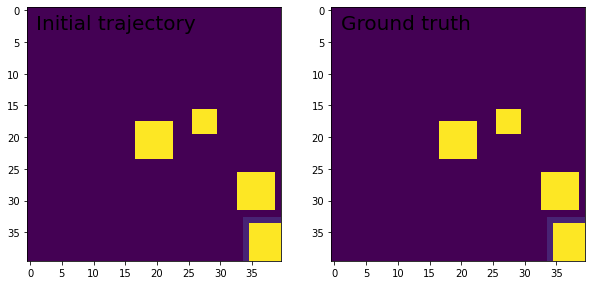

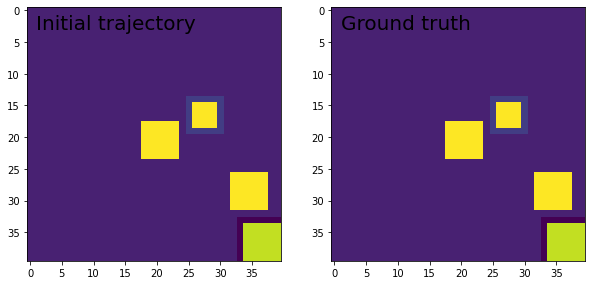

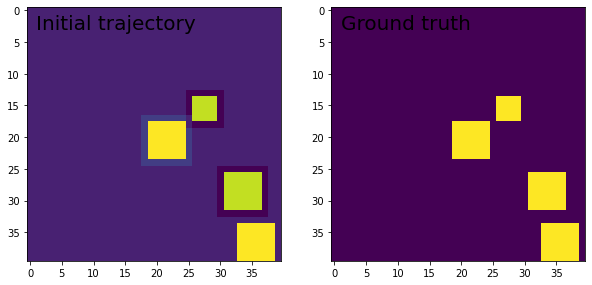

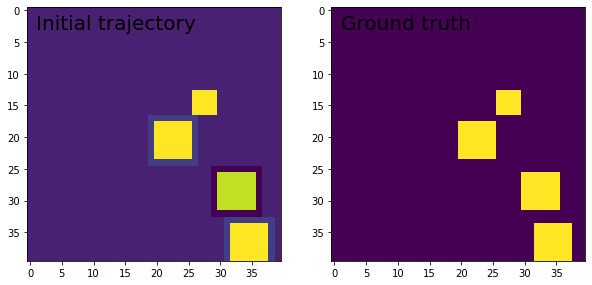

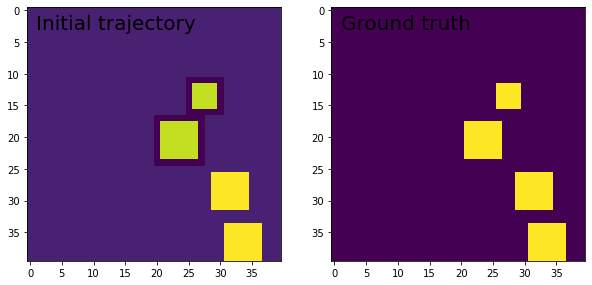

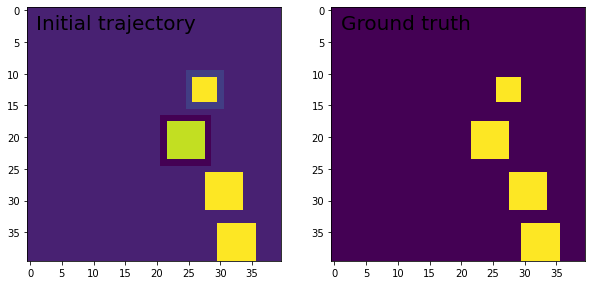

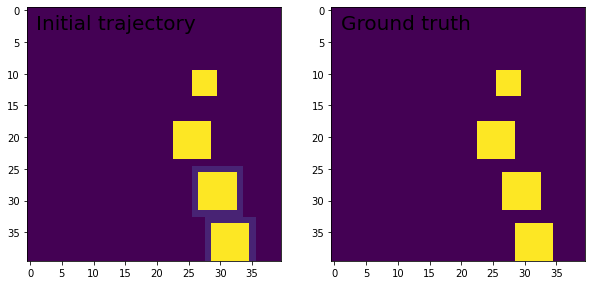

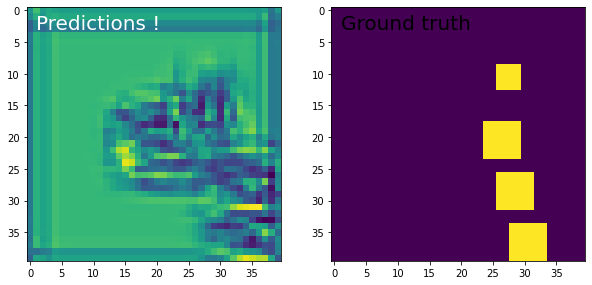

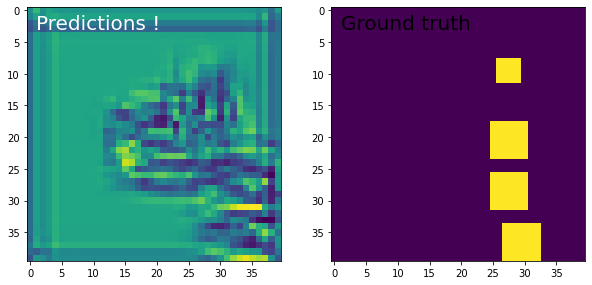

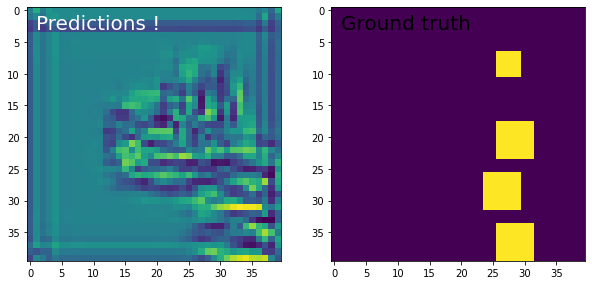

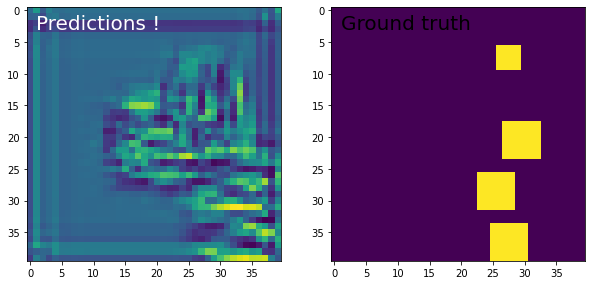

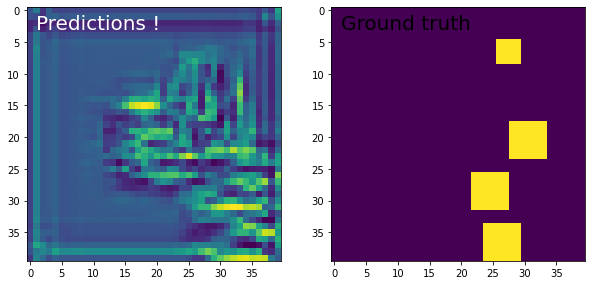

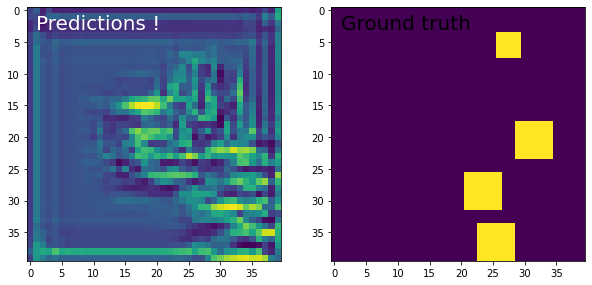

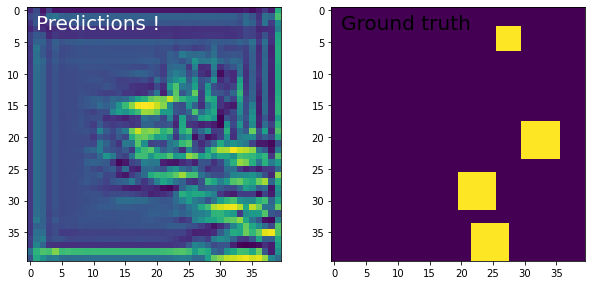

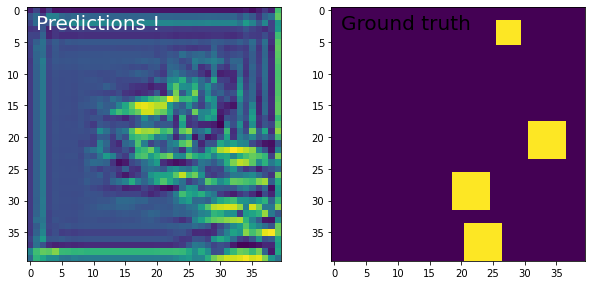

In [62]:
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        epochs=7, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

# 【問題3】他のクラスの説明
ドキュメントには他にも関連するクラスが記載されています。それらがどういうものなのかを説明してください。この中には実際に扱うことは少ないクラスも含まれています。


1. RNN
2. SimpleRNNCell
3. GRUCell
4. LSTMCell
5. StackedRNNCells
6. CuDNNGRU
7. CuDNNLSTM

In [ ]:
# 1. RNN
⇨ SimpleRNNCellで定義したものを、RNNに入れることでレイヤー構造を自由に設定できるもの。
⇨ そもそもSimpleRNNCellでセル単位で設定する事はほとんどない。

# 2. SimpleRNNCell
⇨ 単一のサンプルに対するセルを定義して、RNNに入れてバッチを処理するレイヤーを作成するもの

# 3. GRUCell
⇨ SimpleRNNcellと考え方は基本的に同じなので、GRUのレイヤー構造を独自で作成する時に利用する(入れるのはRNN)

⇨ そもそもSimpleRNNCellでセル単位で設定する事はほとんどない。

# 4. LSTMCell
⇨ SimpleRNNcellと考え方は基本的に同じなので、LSTMのレイヤー構造を独自で作成する時に利用する(入れるのはRNN)
⇨ そもそもSimpleRNNCellでセル単位で設定する事はほとんどない。

# 5. StackedRNNCells
⇨ 束であるRNNのスタックを単一のセルとして作成できるもの
⇨ そもそもSimpleRNNCellでセル単位で設定する事はほとんどない。
⇨ LSTMCellのlayer⇨stackedRNNCellsのlayerに入れる⇨RNNに入れる

# 6. CuDNNGRU
⇨ GPU限定のCuDNNを利用したGRU
⇨ 速度が早いことが特徴

# 7. CuDNNLSTM
⇨ GPU限定のCuDNNを利用したLSTM
⇨ 速度が早いことが特徴